# Lab: Pokémon Data Classification

## Objective
This notebook demonstrates how to classify Pokémon as legendary or not using two machine learning models:
- Logistic Regression
- Multi-Layer Perceptron (MLP)

We will compare the performance of both models using metrics such as accuracy, precision, recall, F1-score, and AUC-ROC.

## Step 1: Load and Explore the Dataset

In [2]:
# Your import 
import pandas as pd

# Load the Pokémon dataset
pokemon_data = pd.read_csv("pokemon.csv")

# Display the first few rows
pokemon_data.head(5)

,name,deck_no,attack,defense,sp_attack,sp_defense,speed,capture_rt,total_bs,type,gen,legendary
0,Bulbasaur,1,49,49,65,65,45,45,318,grass,1,0
1,Ivysaur,2,62,63,80,80,60,45,405,grass,1,0
2,Venusaur,3,100,123,122,120,80,45,625,grass,1,0
3,Charmander,4,52,43,60,50,65,45,309,fire,1,0
4,Charmeleon,5,64,58,80,65,80,45,405,fire,1,0


## Step 2: Data Preprocessing
### 2.1 Feature Engineering

### <span style="color:red">Please create a derived feature: sp_attack_to_sp_defense_ratio, Target is Legendary</span>. 

In [3]:
# Create a derived feature: sp_attack_to_sp_defense_ratio

# your code
pokemon_data["sp_attack_to_sp_defense_ratio"] = pokemon_data["sp_attack"] / pokemon_data["sp_defense"]

# Select all features + derived  
# target: Legendary 
# Your code
features = ['attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'capture_rt', 'total_bs', 'type', 'gen', 'sp_attack_to_sp_defense_ratio']
target = 'legendary' 

X = pokemon_data[features] # Your code
y = pokemon_data[target] # Your code

### 2.2 Data Transformation Using ColumnTransformer

In [4]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline


# Categorical and numerical columns
# your code
numerical_columns = ['attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'capture_rt', 'total_bs', 'gen', 'sp_attack_to_sp_defense_ratio']
categorical_columns = ['type'] 

# Preprocessing pipeline
# please choose one suitable method as your scaling method
# please use OneHot as your Encoder
# Your code

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['attack', 'defense', 'sp_attack',
                                  'sp_defense', 'speed', 'capture_rt',
                                  'total_bs', 'gen',
                                  'sp_attack_to_sp_defense_ratio']),
                                ('cat', OneHotEncoder(), ['type'])])

### Prepare the training data

In [5]:
from sklearn.model_selection import train_test_split

# Transform the data
X_transformed = preprocessor.fit_transform(X)

# Train-test split
# Step 1: First train-test split to create training and temporary sets
# X_transformed: Preprocessed feature data
# y: Target labels
# test_size=0.3: Reserve 30% of the data for validation and test sets
# random_state=42: Ensures reproducibility of the splits
# stratify=y: Maintains the class distribution in the split

#Your code
X_train, X_temp, y_train, y_temp = train_test_split(
    X_transformed, y, 
    test_size=0.3,      
    random_state=42,    
    stratify=y         
)



In [6]:
# Your import 
from sklearn.model_selection import train_test_split

# Please use train_test_split to prepare your data
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, 
    test_size=0.3,      
    random_state=42,    
    stratify=y         
)


# Your code

#Print your X_train and X_test
X_train[:2], X_test[:2]

(array([[-0.40006789, -0.26044725, -0.968214  , -1.10700876, -1.77001294,
          1.19130465, -0.9517153 , -1.39455066, -0.13843446,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  1.        ],
        [ 0.19111895, -0.09784534, -0.19502508, -0.03220389, -0.52510226,
         -0.70940526, -0.1542614 , -0.87620492, -0.30764966,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
          0.        ,  0.        ]]),
 array([[ 1.46683792, -0.42304916,  0.73280163, -0.39047218,  1.34226377,
         -0.70940526,  0.68516375,  0.67883232,  1.24348967,  0.        ,
          0.        ,  0.        ,  0.

## Step 3: Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# Please build your Logistic Regression model
log_reg = LogisticRegression(solver='liblinear')


# Train Logistic Regression
log_reg.fit(X_train, y_train)




# Please use AUC and accuracy score to evaluate your model
# By trying different methods, your accuracy can reach over 90%.

# Predict on validation data
y_val_pred_logistic = log_reg.predict(X_val)

auc_val_logistic = roc_auc_score(y_val, y_val_pred_logistic)
accuracy_score_logistic = accuracy_score(y_val, y_val_pred_logistic)



print("<Jesus Rodriguez> + Logistic Regression - Validation Performance:")
print(classification_report(y_val, y_val_pred_logistic))
print(f"Validation AUC: {auc_val_logistic:.4f}")
print(f"Validation accuracy: {accuracy_score_logistic:.4f}")

<Jesus Rodriguez> + Logistic Regression - Validation Performance:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        93
           1       0.91      0.80      0.86       107

    accuracy                           0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200

Validation AUC: 0.8589
Validation accuracy: 0.8550


## Step 4: Multi-Layer Perceptron (MLP)

In [23]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# Please build your Multi-Layer Perceptron model
# Hidden layer: 8 weights and 4 biases, activation: relu, iteration : 500
# Your code
mlp = MLPClassifier(hidden_layer_sizes=(8, 4), activation='relu', max_iter=500, random_state=42)

# Please use AUC and accuracy score to evalue your model
# By trying different methods, your accuracy can reach over 90%.




# Train MLP Classifier
mlp.fit(X_train, y_train)

# Evaluate MLP Classifier
y_val_pred_mlp = mlp.predict(X_val)

# Calculate AUC and accuracy for evaluation
auc_val_mlp = roc_auc_score(y_val, y_val_pred_mlp)
accuracy_score_mlp = accuracy_score(y_val, y_val_pred_mlp)


print("<Jesus Rodriguez> + MLP Classifier - Validation Performance:")
print(classification_report(y_val, y_val_pred_mlp))
print(f"Validation AUC: {auc_val_mlp:.4f}")
print(f"Validation accuracy: {accuracy_score_mlp:.4f}")

<Jesus Rodriguez> + MLP Classifier - Validation Performance:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81        93
           1       0.85      0.80      0.83       107

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200

Validation AUC: 0.8212
Validation accuracy: 0.8200


C:\Users\rodri\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


## Step 5: Comparison of Models - Training Loss Curve

### Manually record the loss of logistic regression

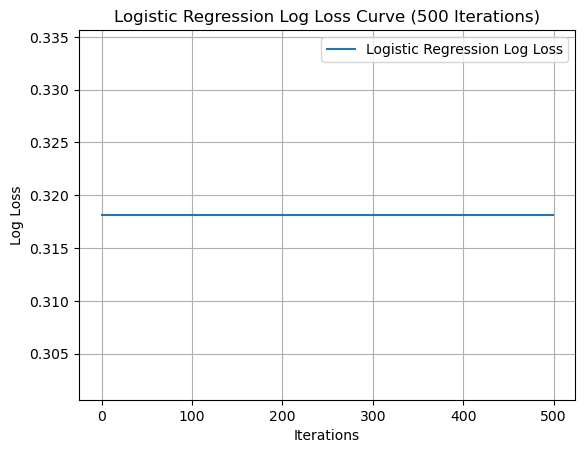

In [22]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
# Please record your loss of logistic regression with 500 iterations
# Your code
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
log_reg = LogisticRegression(max_iter=500, warm_start=True, solver='liblinear', random_state=42)

# Initialize the model with warm_start to fit incrementally


# To store the loss values
loss_curve = []

# Train the model incrementally
for i in range(1, 501):  # 500 iterations
    log_reg.fit(X_train, y_train)  # Fit the model incrementally
    
    # Predict probabilities for the training set
    y_train_prob = log_reg.predict_proba(X_train)
    
    # Calculate log loss for the current iteration
    loss = log_loss(y_train, y_train_prob)
    loss_curve.append(loss)  # Append the current loss value

# Plot the log_loss curve
plt.plot(loss_curve, label='Logistic Regression Log Loss')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('Logistic Regression Log Loss Curve (500 Iterations)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
# Plot ROC Curve Comparison


# Plot ROC curves
# Your code 
 
# please set color of Logistic as green, set MLP as red.
# Your code 
 

In [ ]:
# Your idea:



## Step 6: Visualization of Predictions and Confusion Matrices

### 6.1 Actual vs Predicted Results

In [ ]:
# Please plot the Actual data and Predicted for Logistic and MLP model
# Your code


### Confusion Matrices

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=500, solver='liblinear', random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = log_reg.predict(X_val)

# Compute confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

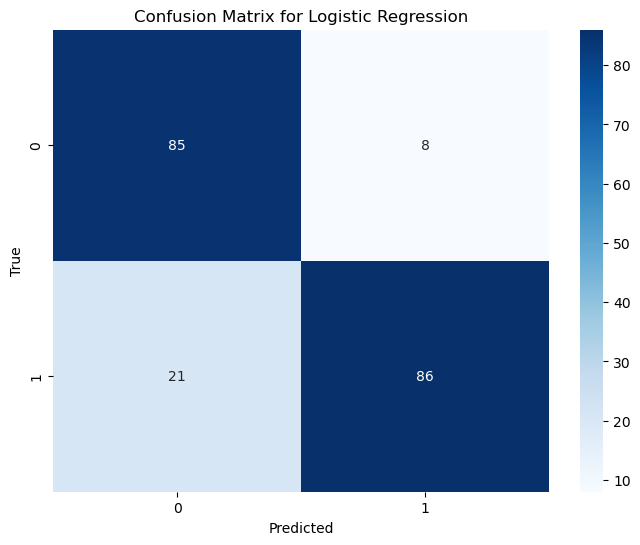

In [20]:
# plot MLP
# Your code
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])

# Adding labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression')

# Show the plot
plt.show()


## Conclusion

In [21]:
# Please compare the difference and common between Logistic results and MLP results
# Your idea : Logistic regression is a linear model, MLP is a neural network with at least one hidden layer, and it can model non-linear relationships.
#Both models use a loss function, but the logistic regression uses binary cross-entropy (log loss), 
#while MLP can also use a similar loss function but it can be more complex due to the non-linear transformations that occur within the hidden layers